In [1]:
# automatic reloading of modules
%load_ext autoreload
%autoreload 2

In [2]:
import os
import openai
import pandas as pd

In [3]:
# print the entire output of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# also print the entire content of a dfs column
pd.set_option('display.max_colwidth', None)

In [4]:
from zero_shot_models.cgpt import *

In [5]:
path_to_data = '../data/liar_dataset/test.tsv'
test = read_data(path_to_data)

path_to_data = '../data/liar_dataset/valid.tsv'
valid = read_data(path_to_data)

path_to_data = '../data/liar_dataset/train.tsv'
train = read_data(path_to_data)

In [6]:
print(get_prompt(test.head(1).statement.values[0]))

Classify the accuracy of the following statement: 'Building a wall on the U.S.-Mexico border will take literally years.'
You can only answer with one of the following categories to describe the accuracy of the claim: 'false', 'half-true', 'mostly-true', 'true', 'pants on fire', 'barely-true', 'pants-fire'. You response should be of the following structure:[label]: [explanation]


In [8]:
calc_price(test, get_prompt(""),token_price=0.02/1000 )

2.5309600000000003

In [6]:
openai.api_key = "somekey"

In [9]:
res = get_response(get_prompt(valid.head(1).statement.values[0]))

In [10]:
res

<OpenAIObject text_completion id=cmpl-6uegEEmFKMp3QNsoQY9l8GROclNj4 at 0x7f9a114aacc0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\nMostly-true: While the overall labor force participation rate has decreased since the 1970s, there are still more Americans working now than in the 70s due to population growth."
    }
  ],
  "created": 1678960762,
  "id": "cmpl-6uegEEmFKMp3QNsoQY9l8GROclNj4",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 38,
    "prompt_tokens": 90,
    "total_tokens": 128
  }
}

In [11]:
get_label_and_explanation(res)

('mostly-true',
 'While the overall labor force participation rate has decreased since the 1970s, there are still more Americans working now than in the 70s due to population growth.')

In [13]:
train_results = get_label_and_explanation_from_df(train)
train_results.to_csv('../data/liar_dataset/train_results.csv')

Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)

In [25]:
valid_results = get_label_and_explanation_from_df(valid)
valid_results.to_csv('../data/liar_dataset/valid_results.csv')

In [26]:
test_results = get_label_and_explanation_from_df(test)
test_results.to_csv('../data/liar_dataset/test_results.csv')

# Results overview

In [14]:
# import pandas, np, matplotlib, and from sklearn import classification report, accuracy, f1, confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


In [7]:
valid_results = pd.read_csv('../data/liar_dataset/valid_results.csv')
test_results = pd.read_csv('../data/liar_dataset/test_results.csv')

In [3]:
valid_true = valid_results.label.values
valid_pred = valid_results.prediction.values

test_true = test_results.label.values
test_pred = test_results.prediction.values

In [10]:
np.unique(valid_pred, return_counts=True)

(array(['barely-true', 'false', 'half-true', 'mostly-true',
        'pants on fire', 'true'], dtype=object),
 array([  1, 411,   6, 831,   3,  32]))

In [11]:
np.unique(test_pred, return_counts=True)

(array(['abstain', 'barely-true', 'false', 'half-true', 'mostly-true',
        'pants on fire', 'true'], dtype=object),
 array([  2,   1, 358,  12, 847,   5,  42]))

               precision    recall  f1-score   support

  barely-true       0.00      0.00      0.00       237
        false       0.25      0.38      0.30       263
    half-true       0.17      0.00      0.01       248
  mostly-true       0.23      0.75      0.35       251
pants on fire       0.00      0.00      0.00         0
   pants-fire       0.00      0.00      0.00       116
         true       0.28      0.05      0.09       169

     accuracy                           0.23      1284
    macro avg       0.13      0.17      0.11      1284
 weighted avg       0.16      0.23      0.14      1284



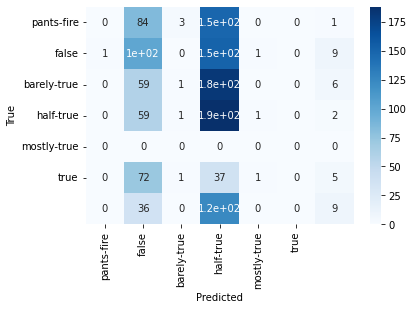

In [9]:
# print classification report and confusion matrix as a heatmap for valid set 
print(classification_report(valid_true, valid_pred, zero_division=0))
cm = confusion_matrix(valid_true, valid_pred)
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

               precision    recall  f1-score   support

      abstain       0.00      0.00      0.00         0
  barely-true       0.00      0.00      0.00       212
        false       0.26      0.38      0.31       249
    half-true       0.25      0.01      0.02       265
  mostly-true       0.23      0.80      0.35       241
pants on fire       0.00      0.00      0.00         0
   pants-fire       0.00      0.00      0.00        92
         true       0.17      0.03      0.06       208

     accuracy                           0.23      1267
    macro avg       0.11      0.15      0.09      1267
 weighted avg       0.17      0.23      0.14      1267



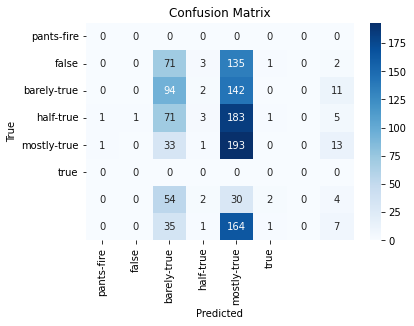

In [12]:
# print classification report and confusion matrix as a heatmap for test set 
print(classification_report(test_true, test_pred, zero_division=0))
cm = confusion_matrix(test_true, test_pred)
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
# print all content in pd column
pd.set_option('display.max_colwidth', None)

In [16]:
test_results.loc[test_results.prediction == 'abstain',['statement','label','prediction','explanation']].T

,32,142
statement,On which team hes rooting for in the World Series.,"The sex-offender registry has been around for a long time, and the research thats out there says that it has no positive impact on the public safety."
label,half-true,mostly-true
prediction,abstain,abstain
explanation,Unanswerable because the statement does not provide enough information to accurately classify its accuracy.,"The research available does not support the idea that the sex-offender registry has a positive impact on public safety, but it has been around for a long time."


              precision    recall  f1-score   support

 barely-true       0.00      0.00      0.00       237
       false       0.20      1.00      0.34       263
   half-true       0.00      0.00      0.00       248
 mostly-true       0.00      0.00      0.00       251
  pants-fire       0.00      0.00      0.00       116
        true       0.00      0.00      0.00       169

    accuracy                           0.20      1284
   macro avg       0.03      0.17      0.06      1284
weighted avg       0.04      0.20      0.07      1284



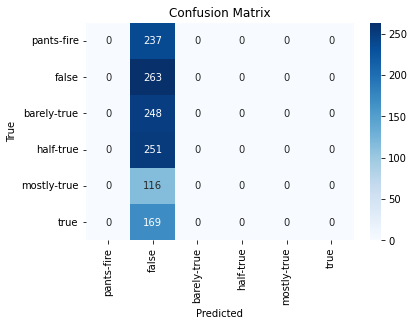

In [17]:
# Get the most used label in valid set and use it as a baseline. 
majority_label = np.unique(valid_true, return_counts=True)[0][np.argmax(np.unique(valid_true, return_counts=True)[1])]
valid_baseline = [majority_label for i in range(len(valid_true))]

# Get the most used label in test set and use it as a baseline.
majority_label = np.unique(test_true, return_counts=True)[0][np.argmax(np.unique(test_true, return_counts=True)[1])]
test_baseline = [majority_label for i in range(len(test_true))]

# print classification report and confusion matrix as a heatmap for valid set
print(classification_report(valid_true, valid_baseline, zero_division=0))
cm = confusion_matrix(valid_true, valid_baseline)
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



              precision    recall  f1-score   support

 barely-true       0.00      0.00      0.00       212
       false       0.00      0.00      0.00       249
   half-true       0.21      1.00      0.35       265
 mostly-true       0.00      0.00      0.00       241
  pants-fire       0.00      0.00      0.00        92
        true       0.00      0.00      0.00       208

    accuracy                           0.21      1267
   macro avg       0.03      0.17      0.06      1267
weighted avg       0.04      0.21      0.07      1267



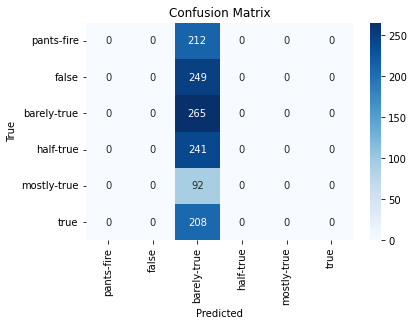

In [18]:
# print classification report and confusion matrix as a heatmap for test set
print(classification_report(test_true, test_baseline, zero_division=0))
cm = confusion_matrix(test_true, test_baseline)
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Embeddings zero-shot model

In [17]:
from zero_shot_models.embeddings import get_spacy_predictions

In [18]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1284 non-null   object
 1   label                1284 non-null   object
 2   statement            1284 non-null   object
 3   subject              1284 non-null   object
 4   speaker              1284 non-null   object
 5   speaker_job          939 non-null    object
 6   state_info           1005 non-null   object
 7   party                1284 non-null   object
 8   barely_true_count    1284 non-null   int64 
 9   false_count          1284 non-null   int64 
 10  half_true_count      1284 non-null   int64 
 11  mostly_true_count    1284 non-null   int64 
 12  pants_on_fire_count  1284 non-null   int64 
 13  context              1272 non-null   object
dtypes: int64(5), object(9)
memory usage: 140.6+ KB


In [19]:
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']


In [20]:
valid_embeddings_results = get_spacy_predictions(valid.copy(), "statement", labels)

In [27]:
valid_embeddings_results.head()

,prediction,max_score,id,label,statement,subject,speaker,speaker_job,state_info,party,barely_true_count,false_count,half_true_count,mostly_true_count,pants_on_fire_count,context
0,half-true,0.691178,12134.json,barely-true,We have less Americans working now than in the 70s.,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,half-true,0.689102,238.json,pants-fire,"When Obama was sworn into office, he DID NOT use the Holy Bible, but instead the Kuran (Their equivalency to our Bible, but very different beliefs).","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,half-true,0.638390,7891.json,false,Says Having organizations parading as being social welfare organizations and then being involved in the political combat harkens back to why the statute a hundred years ago said that they were prohibited.,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,half-true,0.659977,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,half-true,0.694216,929.json,half-true,"On attacks by Republicans that various programs in the economic stimulus plan are not stimulative, ""If you add all that stuff up, it accounts for less than 1 percent of the overall package.""","economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [23]:
test_embeddings_results = get_spacy_predictions(test.copy(), "statement", labels)

              precision    recall  f1-score   support

 barely-true       0.25      0.02      0.04       237
       false       1.00      0.00      0.01       263
   half-true       0.20      0.97      0.33       248
 mostly-true       0.09      0.01      0.01       251
  pants-fire       0.00      0.00      0.00       116
        true       0.00      0.00      0.00       169

    accuracy                           0.19      1284
   macro avg       0.26      0.17      0.06      1284
weighted avg       0.31      0.19      0.07      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

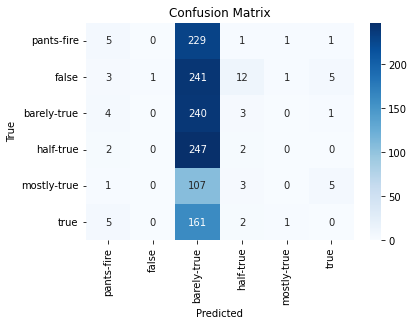

In [25]:
# print classification report and confusion matrix as a heatmap for valid set
print(classification_report(valid_embeddings_results.label, valid_embeddings_results.prediction, zero_division=0))
cm = confusion_matrix(valid_embeddings_results.label, valid_embeddings_results.prediction)
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

 barely-true       0.15      0.01      0.02       212
       false       0.50      0.00      0.01       249
   half-true       0.21      0.96      0.35       265
 mostly-true       0.32      0.05      0.08       241
  pants-fire       0.00      0.00      0.00        92
        true       0.20      0.00      0.01       208

    accuracy                           0.21      1267
   macro avg       0.23      0.17      0.08      1267
weighted avg       0.26      0.21      0.09      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

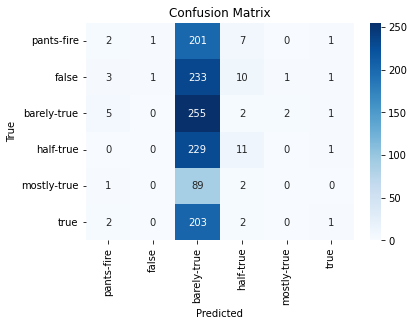

In [26]:
# print classification report and confusion matrix as a heatmap for test set
print(classification_report(test_embeddings_results.label, test_embeddings_results.prediction, zero_division=0))
cm = confusion_matrix(test_embeddings_results.label, test_embeddings_results.prediction)
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Zero-shot classification with sentence-transformer NLI models

In [7]:
from zero_shot_models.nli_sentencetransformer import get_nli_transformer_prediction

In [9]:
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']

valid_nli_results = get_nli_transformer_prediction(valid.copy(), "statement", labels)
valid_nli_results.to_csv('valid_nli_results.csv', index=False)


100%|██████████| 1284/1284 [06:08<00:00,  3.48it/s]


In [10]:
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']

test_nli_results = get_nli_transformer_prediction(test.copy(), "statement", labels)
test_nli_results.to_csv('test_nli_results.csv', index=False)


100%|██████████| 1267/1267 [05:40<00:00,  3.72it/s]


              precision    recall  f1-score   support

 barely-true       0.19      0.13      0.15       237
       false       0.22      0.62      0.32       263
   half-true       0.18      0.13      0.15       248
 mostly-true       0.00      0.00      0.00       251
  pants-fire       0.00      0.00      0.00       116
        true       0.15      0.18      0.16       169

    accuracy                           0.20      1284
   macro avg       0.12      0.18      0.13      1284
weighted avg       0.13      0.20      0.15      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

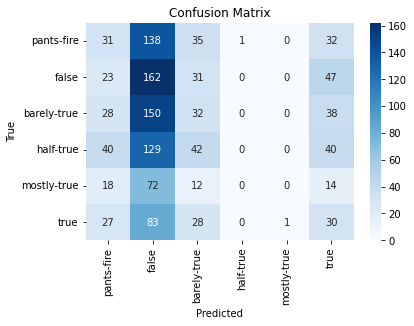

In [15]:
# print classification report and confusion matrix as a heatmap for valid set
print(classification_report(valid_nli_results.label, valid_nli_results.prediction, zero_division=0))
cm = confusion_matrix(valid_nli_results.label, valid_nli_results.prediction)
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

 barely-true       0.14      0.12      0.13       212
       false       0.20      0.56      0.30       249
   half-true       0.22      0.14      0.17       265
 mostly-true       0.00      0.00      0.00       241
  pants-fire       0.00      0.00      0.00        92
        true       0.17      0.18      0.18       208

    accuracy                           0.19      1267
   macro avg       0.12      0.17      0.13      1267
weighted avg       0.14      0.19      0.14      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

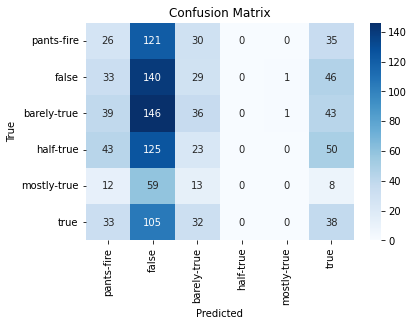

In [16]:
# print classification report and confusion matrix as a heatmap for test set
print(classification_report(test_nli_results.label, test_nli_results.prediction, zero_division=0))
cm = confusion_matrix(test_nli_results.label, test_nli_results.prediction)
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Zero-shot classification with Sentence transformer

In [17]:
from zero_shot_models.transfomer import get_transformer_prediction

In [18]:
model_name = 'cross-encoder/nli-distilroberta-base'
valid_sentransformer_results = get_transformer_prediction(valid.copy(), "statement", labels, model_name)
valid_sentransformer_results.to_csv('valid_sentransformer_results.csv', index=False)


100%|██████████| 1284/1284 [08:17<00:00,  2.58it/s]


In [19]:
test_sentransformer_results = get_transformer_prediction(test.copy(), "statement", labels, model_name)
test_sentransformer_results.to_csv('test_sentransformer_results.csv', index=False)


100%|██████████| 1267/1267 [09:10<00:00,  2.30it/s]


# Zero-shot classification with transformer models

In [20]:
from zero_shot_models.transfomer import get_transformer_prediction

In [21]:
labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
valid_transformer_results = get_transformer_prediction(valid.copy(), "statement", labels)
valid_transformer_results.to_csv('valid_transformer_results.csv', index=False)

100%|██████████| 1284/1284 [55:20<00:00,  2.59s/it] 


In [22]:
test_transformer_results = get_transformer_prediction(test.copy(), "statement", labels)
test_transformer_results.to_csv('test_transformer_results.csv', index=False)

100%|██████████| 1267/1267 [51:07<00:00,  2.42s/it] 
